In [1]:
import importlib
import sys
sys.path.append('../')  # Agrega la ruta al directorio utils

import utils.imports as imp
import utils.visuals as visu
import utils.processing as proc



importlib.reload(imp)
importlib.reload(visu)
importlib.reload(proc)

<module 'utils.processing' from 'd:\\Descargas\\CIencia de datos 1 - 2024\\Repositorios\\inegi_explore\\notebooks\\..\\utils\\processing.py'>

In [2]:
dataset = imp.pd.read_csv("../../cancer.csv")
dataset.drop(columns=['Unnamed: 32'], inplace=True)
dataset.drop(columns=['id'], inplace=True)
dataset['y'] = imp.label_encoder.fit_transform(dataset['diagnosis'])

dataset.drop(columns=['diagnosis'], inplace=True)

In [3]:
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [130]:
import pandas as pd

# Supongamos que 'data' es tu DataFrame
# data = pd.read_csv('tu_archivo.csv')  # Si estás cargando datos desde un archivo CSV

# Filtrar las filas con un valor de 'concave points_mean' entre 0 y 0.1
filtro = (dataset['concave points_mean'] >= 0) & (dataset['concave points_mean'] <= 0.1)
filas_filtradas = dataset[filtro]

# Mostrar las filas filtradas
filas_filtradas.to_csv('filas_filtradas2.csv', index=False)

print("Filas filtradas guardadas en 'filas_filtradas.csv'.")

Filas filtradas guardadas en 'filas_filtradas.csv'.


In [3]:
import pandas as pd

dataaux = dataset['y']
data = pd.DataFrame(dataset.drop('y', axis=1))

data['y'] = dataset['y']

print(data.columns)
print(len(data))

print(data.head())


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'y'],
      dtype='object')
569
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1 

In [9]:
data.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'y'],
      dtype='object')

In [6]:
import pandas as pd
import scorecardpy as sc

# Suponiendo que 'data' es tu DataFrame que contiene características y la variable objetivo
# Es posible que necesites preprocesar tus datos antes de calcular el IV

# Calcular el IV de las características
iv_result = sc.iv(data, y="y")

# Imprimir los resultados
print(iv_result)


                   variable  info_value
0          smoothness_worst    0.203971
27             radius_worst    0.200218
18     concave points_worst    0.168098
2               radius_mean    0.167268
19            symmetry_mean    0.167231
22        concave points_se    0.110980
7              texture_mean    0.109245
6           smoothness_mean    0.099180
24             concavity_se    0.097411
21           concavity_mean    0.095240
3       concave points_mean    0.089652
13          concavity_worst    0.089640
23          perimeter_worst    0.080645
25           perimeter_mean    0.079855
26           symmetry_worst    0.075676
20              symmetry_se    0.073807
4    fractal_dimension_mean    0.073247
29            texture_worst    0.066251
8                   area_se    0.063743
17             perimeter_se    0.060833
14        compactness_worst    0.058809
11               texture_se    0.053714
10                area_mean    0.048398
5                 radius_se    0.047603


In [13]:
df_norm = proc.normalize_gen_data(data)

explained variance ratio (first two components): [0.44272026 0.18971182]


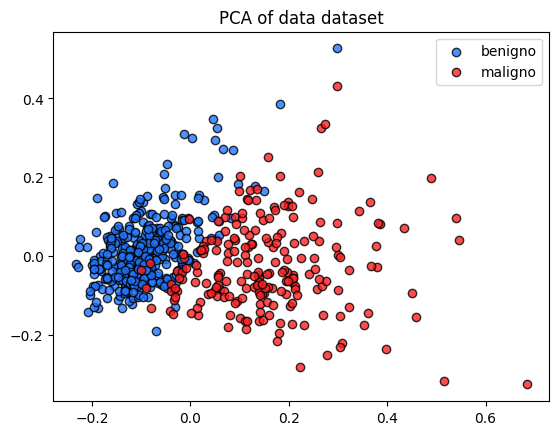

In [24]:
X =  pd.DataFrame(df_norm.drop('y', axis=1))
y = dataset['y']
target_names = ['benigno', 'maligno']

pca = imp.PCA(n_components=2)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

imp.plt.figure()
colors = ["#2176ff", "#ff2121"]
lw = 1

for color, i, target_name in zip(colors, [0, 1], target_names):
    imp.plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name, edgecolors="#000000"
    )
imp.plt.legend(loc="best", shadow=False, scatterpoints=1)
imp.plt.title("PCA of data dataset")

imp.plt.show()


C:\Users\chent\AppData\Local\Temp\ipykernel_17288\782243985.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


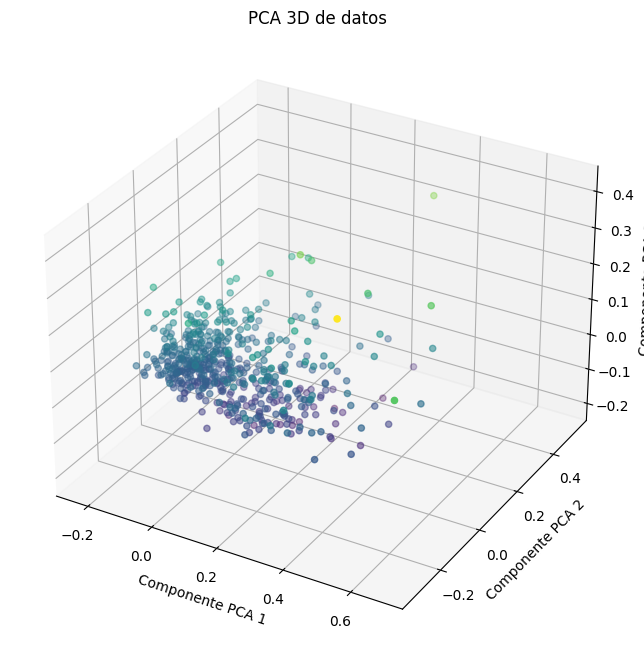

In [9]:
#3D
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Suponiendo que sus datos están en df_norm y la variable objetivo en y

pca = PCA(n_components=3)
X_r = pca.fit_transform(df_norm.drop('y', axis=1))

# Gráfico de dispersión 3D con coloración
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Colorea cada punto en función del tercer componente PCA
cmap = plt.cm.get_cmap('viridis')
ax.scatter(X_r[:, 0], X_r[:, 1], X_r[:, 2], c=X_r[:, 2], cmap=cmap)

# Etiquetado de ejes
ax.set_xlabel('Componente PCA 1')
ax.set_ylabel('Componente PCA 2')
ax.set_zlabel('Componente PCA 3')

# Personalización (opcional)
ax.set_title('PCA 3D de datos')
plt.show()


In [25]:

import pandas as pd
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Suponiendo que sus datos están en un DataFrame llamado 'df'
# Cargar datos

# Seleccionar características y variable objetivo


# Normalizar datos (opcional)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = X

# Aplicar PCA
pca = PCA(n_components=3)
X_r = pca.fit_transform(X_norm)

# Definir colores en función de la variable objetivo
colors = ['red' if label == 1 else 'blue' for label in y]

# Crear la figura de Plotly
# ... (código previo para cargar datos, aplicar PCA y definir colores)

# Crear la figura de Plotly
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=X_r[:, 0],
            y=X_r[:, 1],
            z=X_r[:, 2],
            mode='markers',
            
            marker=dict(size=3, color=colors, opacity=0.8,), # Cambiar el tamaño a 3
            name='Datos'
        )
    ],
    layout=dict(
        title='PCA 3D de datos',
        width=800, # Aumentar el ancho a 800 píxeles
        height=800, # Aumentar la altura a 600 píxeles
        scene=dict(
            xaxis=dict(title='PC1'), # Cambiar título a 'PC1'
            yaxis=dict(title='PC2'), # Cambiar título a 'PC2'
            zaxis=dict(title='PC3')  # Cambiar título a 'PC3'
        )
    )
)

# Mostrar el gráfico interactivo
fig.show()



19.678707842971914


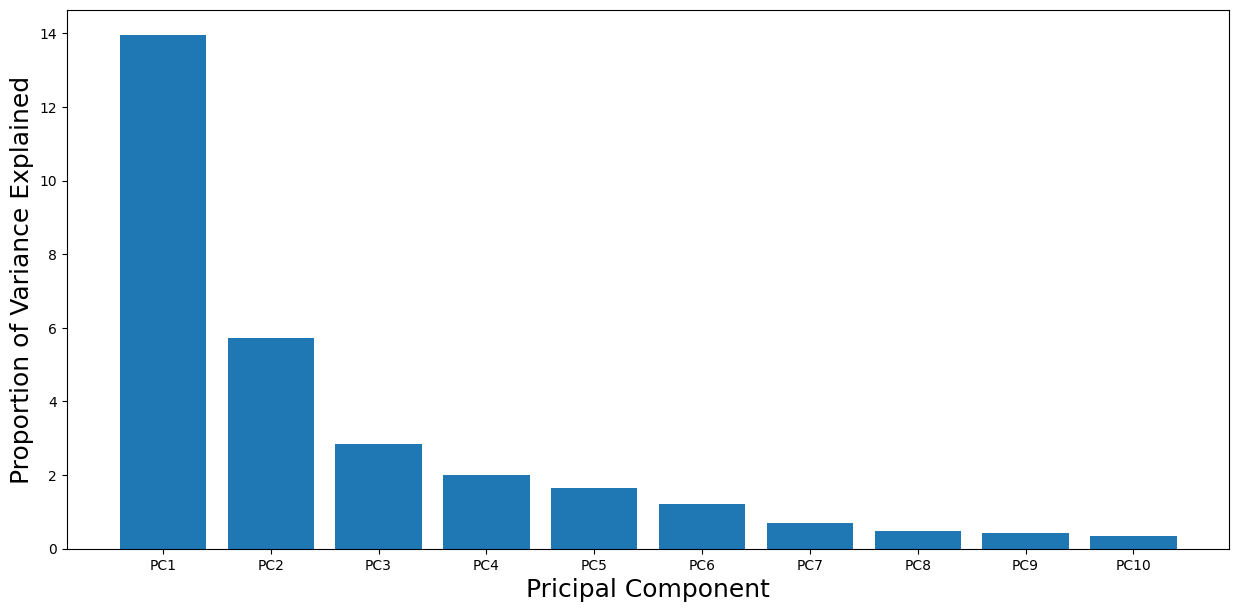

In [5]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)
pca = imp.PCA().fit(scaled)
var = pca.explained_variance_[0:10] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

imp.plt.figure(figsize=(15,7))
imp.plt.bar(labels,var,)
imp.plt.xlabel('Pricipal Component', fontsize=18)
imp.plt.ylabel('Proportion of Variance Explained', fontsize=18)

print(var[0]+ var[1])

In [57]:
# Preparar datos



     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.045951     -0.086842        0.053192   0.041231         0.065696   
1       0.076643     -0.014812        0.070617   0.079947        -0.034638   
2       0.066174      0.019108        0.065613   0.065294         0.039465   
3      -0.032206      0.010628       -0.024825  -0.032020         0.137533   
4       0.073312     -0.048244        0.074412   0.076492         0.011743   
..           ...           ...             ...        ...              ...   
564     0.088420      0.030219        0.086317   0.098173         0.043638   
565     0.071408      0.087337        0.067684   0.072204         0.004291   
566     0.029415      0.085680        0.028175   0.024208        -0.035204   
567     0.077000      0.097863        0.083039   0.072680         0.063907   
568    -0.075745      0.051175       -0.075996  -0.056453        -0.130351   

     compactness_mean  concavity_mean  concave points_mean  sym

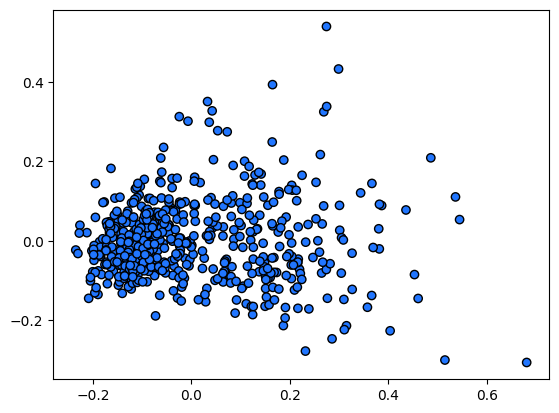

1138


In [12]:
df_norm = proc.normalize_gen_data(data)
print(df_norm)
print()

pca = imp.PCA(n_components=2)
df_r = pca.fit(df_norm).transform(df_norm)
print(df_r)
colour = ['#ff2121' if y == 1 else '#2176ff' for y in df_norm['y']]
imp.plt.scatter(df_r[:, 0], df_r[:, 1], c=colour, edgecolors='#000000')
imp.plt.show()

print(df_r.size)


In [9]:
import ipywidgets as widgets
from IPython.display import display

# Widget para seleccionar el número de componentes principales
n_components_slider = widgets.IntSlider(value=2, min=1, max=min(df_norm.shape), step=1, description='Components')

def update_pca(n_components):
    pca = imp.PCA(n_components=n_components)
    df_r = pca.fit_transform(df_norm)
    imp.plt.scatter(df_r[:, 0], df_r[:, 1], c=colour, edgecolors='#000000')
    imp.plt.xlabel('Component 1')
    imp.plt.ylabel('Component 2')
    imp.plt.title(f'PCA with {n_components} Components')
    imp.plt.show()

widgets.interact(update_pca, n_components=n_components_slider)


interactive(children=(IntSlider(value=2, description='Components', max=31, min=1), Output()), _dom_classes=('w…

<function __main__.update_pca(n_components)>

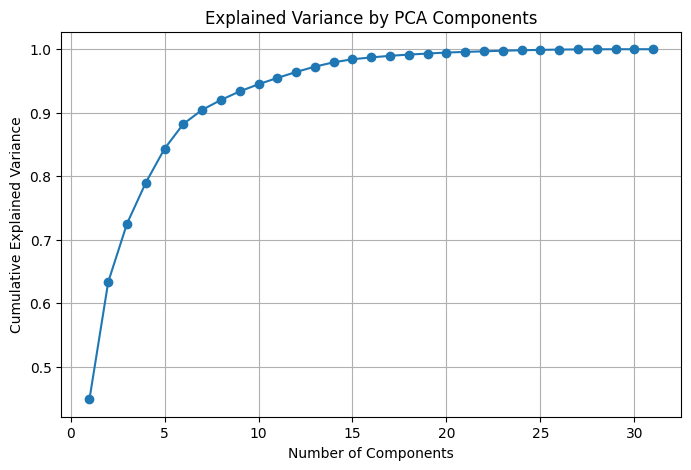

In [186]:
pca = imp.PCA().fit(df_norm)
explained_variance = pca.explained_variance_ratio_

imp.plt.figure(figsize=(8, 5))
imp.plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
imp.plt.xlabel('Number of Components')
imp.plt.ylabel('Cumulative Explained Variance')
imp.plt.title('Explained Variance by PCA Components')
imp.plt.grid(True)
imp.plt.show()

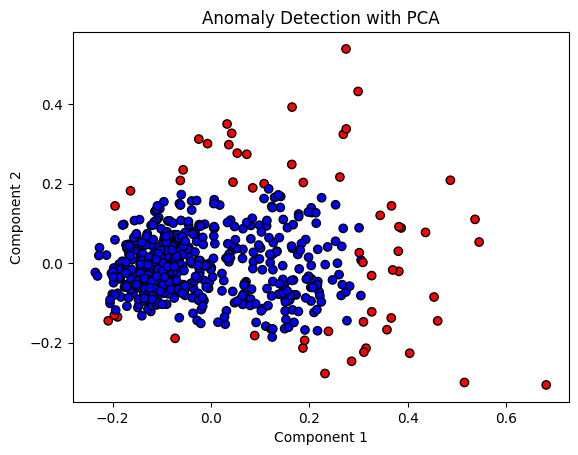

In [10]:
from sklearn.ensemble import IsolationForest

# Entrenar un modelo de aislamiento de bosque con los datos PCA
clf = IsolationForest(contamination=0.1)  # Ajusta el parámetro de contaminación según tu necesidad
clf.fit(df_r)

# Predicciones de anomalías (1: normal, -1: anomalía)
anomalies = clf.predict(df_r)

# Visualización de anomalías
imp.plt.scatter(df_r[:, 0], df_r[:, 1], c=['red' if x == -1 else 'blue' for x in anomalies], edgecolors='#000000')
imp.plt.xlabel('Component 1')
imp.plt.ylabel('Component 2')
imp.plt.title('Anomaly Detection with PCA')
imp.plt.show()


In [189]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_r, data['y'], test_size=0.5, random_state=42)

# Entrenar un clasificador de bosque aleatorio
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.9578947368421052


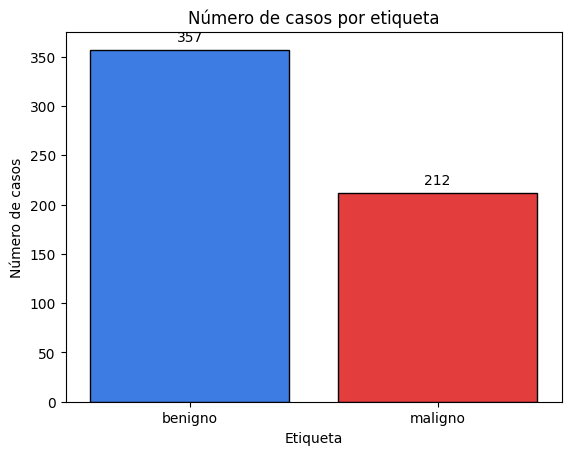

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una gráfica de barras usando seaborn
ax = sns.countplot(x='y', data=data, palette={0: '#2176ff', 1: '#ff2121'}, edgecolor='black')

# Modificar las etiquetas del eje x
ax.set_xticklabels(['benigno', 'maligno'])

# Agregar números exactos encima de las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.xlabel('Etiqueta')
plt.ylabel('Número de casos')
plt.title('Número de casos por etiqueta')
plt.show()



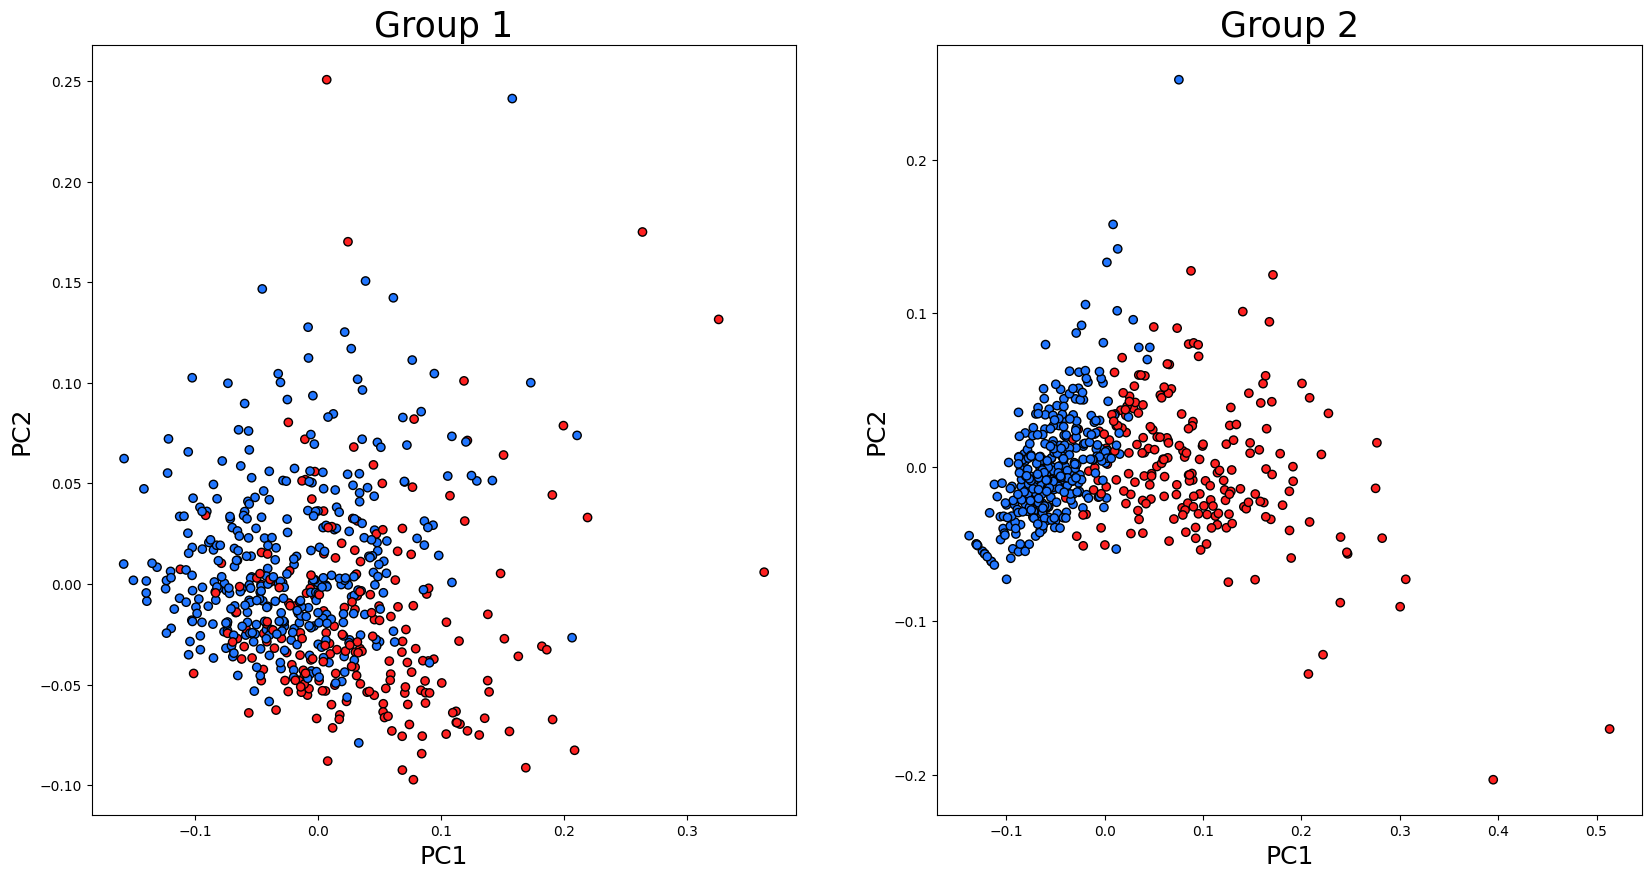

In [14]:

group_1 = ['smoothness_mean','smoothness_se','smoothness_worst',
        'symmetry_mean', 'symmetry_se','symmetry_worst']

group_2 = ['concave points_mean', 'concave points_se', 'concave points_worst',
           'area_mean', 'area_se', 'area_worst']

fig, ax = imp.plt.subplots(nrows=1, ncols=2,figsize=(20,10))

group = [group_1,group_2]


for i, g in enumerate(group):
        #Scale the data
        scaler = StandardScaler()

        scaled = df_norm[g]


        #Obtain principal components
        pca = imp.PCA().fit(scaled)

        pc = pca.transform(scaled)
        pc1 = pc[:,0]
        pc2 = pc[:,1]

        #Plot principal components

        colour = ['#ff2121' if y == 1 else '#2176ff' for y in data['y']]
        ax[i].scatter(pc1,pc2 ,c=colour,edgecolors='#000000')
        ax[i].set_title('Group {}'.format(i+1), fontsize=25)
        ax[i].set_xlabel('PC1', fontsize=18)
        ax[i].set_ylabel('PC2', fontsize=18)



In [54]:
# Separar la columna 'y' del resto de los datos
y = data['y']
X = data.drop('y', axis=1)


# Normalizar los datos sin la columna 'y'
X_norm = proc.normalize_gen_data(X)

# Crear un nuevo DataFrame normalizado y agregar la columna 'y' de nuevo
normdata = X_norm.copy()
normdata['y'] = y
normdata


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y
0,0.045951,-0.086842,0.053192,0.041231,0.065696,0.137531,0.111116,0.106074,0.092881,0.094483,...,-0.056934,0.096487,0.083822,0.054773,0.109600,0.088358,0.096172,0.115211,0.081132,1
1,0.076643,-0.014812,0.070617,0.079947,-0.034638,-0.020401,-0.000999,0.022959,0.000058,-0.036384,...,-0.015464,0.064299,0.079184,-0.015733,-0.018029,-0.006147,0.045533,-0.010215,0.011778,1
2,0.066174,0.019108,0.065613,0.065294,0.039465,0.044102,0.057110,0.085330,0.039359,-0.016671,...,-0.001004,0.056439,0.060997,0.022091,0.045359,0.035811,0.081886,0.048263,0.008435,1
3,-0.032206,0.010628,-0.024825,-0.032020,0.137533,0.142532,0.080248,0.060805,0.120101,0.205695,...,0.005612,-0.010469,-0.023038,0.142170,0.163076,0.083335,0.091134,0.253240,0.206705,1
4,0.073312,-0.048244,0.074412,0.076492,0.011743,0.022590,0.057425,0.059833,-0.000400,-0.023558,...,-0.061436,0.056065,0.051130,0.009238,-0.013127,0.025683,0.030545,-0.036371,-0.016633,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.088420,0.030219,0.086317,0.098173,0.043638,0.009175,0.081563,0.097214,-0.013093,-0.038996,...,0.004930,0.073407,0.084412,0.015848,-0.011448,0.027833,0.068238,-0.056971,-0.029700,1
565,0.071408,0.087337,0.067684,0.072204,0.004291,-0.000747,0.029028,0.052929,-0.009117,-0.044340,...,0.085756,0.059558,0.062617,-0.028952,-0.016537,0.009909,0.030737,-0.022277,-0.040795,1
566,0.029415,0.085680,0.028175,0.024208,-0.035204,-0.001620,0.001951,0.004431,-0.033890,-0.037512,...,0.057586,0.024252,0.017923,-0.033910,0.014691,0.013687,0.017343,-0.046264,-0.013337,1
567,0.077000,0.097863,0.083039,0.072680,0.063907,0.137055,0.138094,0.111367,0.089517,0.043716,...,0.093736,0.096487,0.069244,0.059914,0.163556,0.133933,0.095917,0.080381,0.092970,1


In [128]:
import pandas as pd

# Supongamos que 'data' es tu DataFrame
# data = pd.read_csv('tu_archivo.csv')  # Si estás cargando datos desde un archivo CSV

# Filtrar las filas con un valor de 'concave points_mean' entre 0 y 0.1
filtro = (normdata['concave points_mean'] >= 0) & (normdata['concave points_mean'] <= 0.1)
filas_filtradas = normdata[filtro]

# Mostrar las filas filtradas
filas_filtradas.to_csv('filas_filtradas.csv', index=False)

print("Filas filtradas guardadas en 'filas_filtradas.csv'.")


Filas filtradas guardadas en 'filas_filtradas.csv'.


In [188]:
training_data, test_data = proc.split_data(normdata, 0.8)
training_input = training_data[data[group_2].columns]
training_output = training_data['y']
model = proc.simple_linear_regression(training_input, training_output, 9)

In [170]:
test_input = test_data[data[group_2].columns]
test_output = test_data['y']
test_predictions = proc.test_predictions(model, test_input, 9)

In [171]:
coefficients = proc.get_coefficients(model)
print("Coefficients: ", coefficients)
MSE = proc.get_mean_squared_error(test_output, 
                                  test_predictions)
print("Mean Squared Error: ", MSE)
R2 = proc.get_coefficient_determination(test_output,
                                        test_predictions)
print("R² Score: ", R2)

Coefficients:  [ 0.73000635 -1.33301721  5.61746194  6.27093622  2.79356564  0.97845667
 -6.51532983 -2.08962543  3.02018447]
Mean Squared Error:  0.07593967152306064
R² Score:  0.6821539545527548
